In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot
from sklearn.cluster import KMeans
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline



In [2]:
df = pd.read_excel(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\data.xlsx')
#预处理，求和重复数据
df = df.groupby(['投资方所在城市','融资方所在城市','年份']).sum().reset_index()
df

,投资方所在城市,融资方所在城市,年份,投资企业对数
0,七台河,七台河,2013,5
1,七台河,七台河,2014,17
2,七台河,七台河,2015,9
3,七台河,七台河,2016,14
4,七台河,营口,2014,5
...,...,...,...,...
7216,龙岩,厦门,2015,7
7217,龙岩,龙岩,2013,151
7218,龙岩,龙岩,2014,130
7219,龙岩,龙岩,2015,138


In [3]:
#筛选同城投资
data_tc = df[df['投资方所在城市']==df['融资方所在城市']]
data_tc = data_tc.sort_values(by = '投资企业对数', ascending = False).reset_index()
del data_tc['index']

In [4]:
#筛选跨城投资
data_kc = df[df['投资方所在城市']!=df['融资方所在城市']]
data_kc = data_kc.sort_values(by = '投资企业对数', ascending = False).reset_index()
del data_kc['index']

In [5]:
#比较'同城投资','跨城投资' top 20 数据分布
#同城
tc_sum  = data_tc.groupby(['投资方所在城市','融资方所在城市']).sum().sort_values(by = '投资企业对数',ascending = False)
del tc_sum['年份']
#跨城
kc_sum  = data_kc.groupby(['投资方所在城市','融资方所在城市']).sum().sort_values(by = '投资企业对数',ascending = False)
del kc_sum['年份']


In [6]:
tc_sum.iloc[:20]

,,投资企业对数
投资方所在城市,融资方所在城市,
深圳,深圳,92065
北京,北京,91391
上海,上海,84298
南京,南京,23873
杭州,杭州,23791
成都,成都,20639
广州,广州,20534
苏州,苏州,16768
武汉,武汉,16404


In [7]:
kc_sum.iloc[:20]

投资企业对数
投资方所在城市 融资方所在城市        
北京      上海         8065
上海      北京         6733
北京      深圳         6467
        天津         4862
深圳      北京         4674
上海      深圳         3580
深圳      上海         3495
广州      深圳         3324
上海      苏州         2804
天津      北京         2736
上海      杭州         2708
北京      宁波         2545
上海      宁波         2499
北京      成都         2266
深圳      广州         2114
杭州      上海         1991
北京      杭州         1816
        嘉兴         1767
上海      嘉兴         1743
苏州      上海         1521

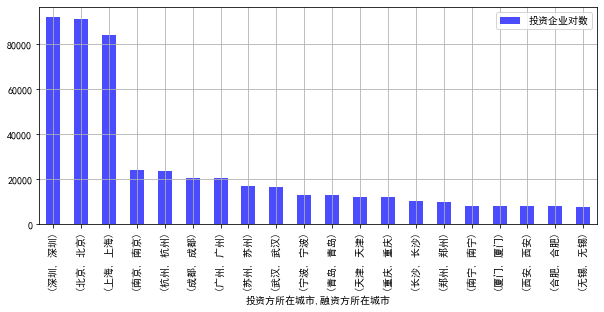

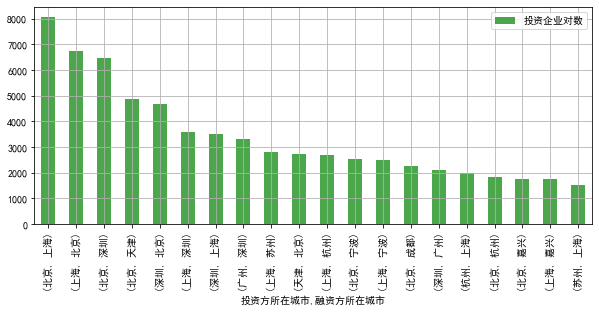

In [8]:
tc_sum.iloc[:20].plot(kind = 'bar', grid = True, figsize = (10,4),
                     color = 'blue', alpha = 0.7)
plt.savefig(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\图片\同城投资柱状图.png',bbox_inches='tight')
kc_sum.iloc[:20].plot(kind = 'bar', grid = True, figsize = (10,4),
                     color = 'green', alpha = 0.7)
plt.savefig(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\图片\跨城投资柱状图.png',bbox_inches='tight')

In [9]:
#分开年份
def f1(year):
    tc_year = data_tc[data_tc['年份']==year].sort_values(by = '投资企业对数', ascending = False)
    kc_year = data_kc[data_kc['年份']==year].sort_values(by = '投资企业对数', ascending = False)
    tc_year.index = tc_year['投资方所在城市']
    kc_year.index = kc_year['投资方所在城市']+ '-' + kc_year['融资方所在城市']
    return(tc_year.iloc[:20], kc_year.iloc[:20])

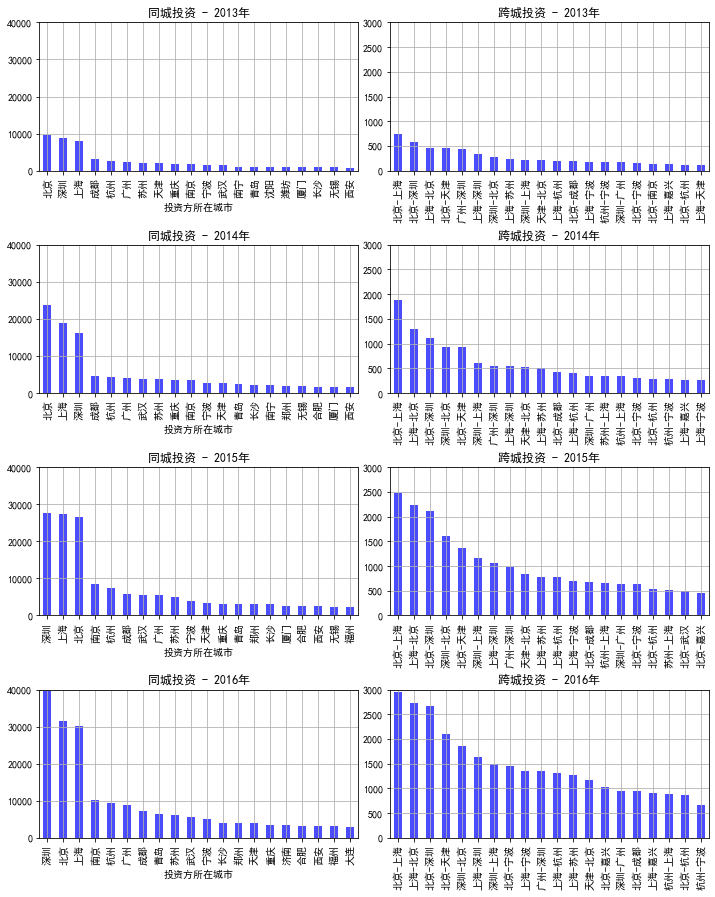

In [10]:
#画图
fig,axes = plt.subplots(4, 2, figsize = (12, 15))
plt.subplots_adjust(wspace = 0.1, hspace = 0.5)
for i in range(2013,2017):
    f1(i)[0]['投资企业对数'].plot(kind = 'bar', grid = True, color = 'blue',alpha = 0.7, ylim = [0, 40000],
                               ax = axes[i-2013,0], title = '同城投资 - %s年' % str(i) )
    f1(i)[1]['投资企业对数'].plot(kind = 'bar', grid = True, color = 'blue',alpha = 0.7, ylim = [0,3000],
                               ax = axes[i-2013,1], title = '跨城投资 - %s年' % str(i))
plt.savefig(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\图片\随年份增加同城跨城投资变化.png')

In [11]:
#读取城市的经纬度坐标信息，便于之后的Qgis画图
city = pd.read_excel(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\中国城市代码对照表.xlsx')
#之前的index是city-city，将城市提取出来，设置为0123...
kc_sum.reset_index(inplace = True)

kc_data = pd.merge(kc_sum,city[['城市名称','经度','纬度']],left_on ='投资方所在城市',right_on = '城市名称')
kc_data = pd.merge(kc_data,city[['城市名称','经度','纬度']],left_on ='融资方所在城市',right_on = '城市名称')
kc_data = kc_data[['投资方所在城市','融资方所在城市','投资企业对数','经度_x','纬度_x','经度_y','纬度_y']]
kc_data.columns = ['投资方所在城市','融资方所在城市','投资企业对数','lng_tz','lat_tz','lng_rz','lat_rz']
print('finished!')

finished!


In [12]:
#提取核心字段，转化为gephi标准格式利用gephi来观察城市关系
#处理边数据
gephi_edges = kc_data[['投资方所在城市','融资方所在城市','投资企业对数']]
gephi_edges.columns = ['source','target','weight']
gephi_edges['weight'] = (gephi_edges['weight'] -gephi_edges['weight'].min() )/(gephi_edges['weight'].max() - gephi_edges['weight'].min() )

gephi_edges.to_csv(r'C:\Users\89344\Desktop\Gephi图表\gephi_edges.csv',index = False,encoding = 'utf8')

In [13]:
#处理点数据
citys = list(set(gephi_edges['source'].tolist() + gephi_edges['target'].tolist()))
gephi_nodes = pd.DataFrame({'Id':citys})
top_node = gephi_edges.sort_values(by = 'weight', ascending = False)
top_node20 = top_node['source'].drop_duplicates().iloc[:20]
top_node20_df = pd.DataFrame({'Id':top_node20, 'label':top_node20})
gephi_nodes = pd.merge(gephi_nodes, top_node20_df, on = 'Id', how = 'left')
gephi_nodes.to_csv(r'C:\Users\89344\Desktop\Gephi图表\gephi_nodes.csv',index = False,encoding = 'utf8')


In [14]:
#导出Qgis数据

kc_data.to_csv(r'C:\Users\89344\Desktop\Qgis图表\qgis_city.csv',index = False,encoding = 'utf8')

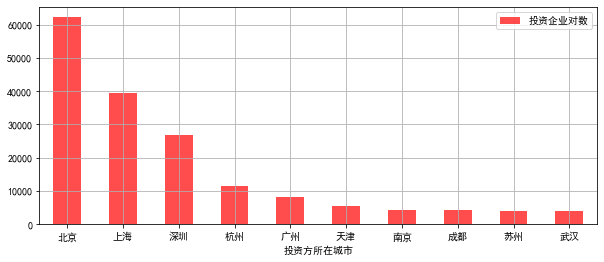

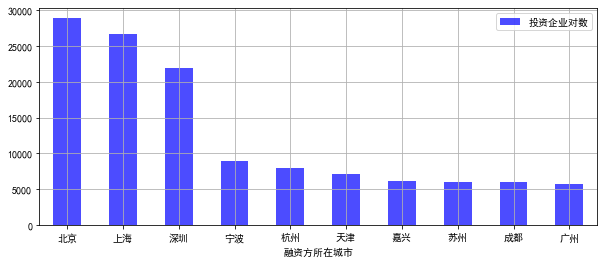

In [15]:
#四年之内向外投资，吸引投资 top10
result1 = kc_sum[['投资方所在城市','投资企业对数']].groupby('投资方所在城市').sum().sort_values(by = '投资企业对数', ascending = False)
result2 = kc_sum[['融资方所在城市','投资企业对数']].groupby('融资方所在城市').sum().sort_values(by = '投资企业对数', ascending = False)

#数据解析
result1.iloc[:10].plot(kind = 'bar', grid = True, color = 'red', figsize = (10,4),
                       alpha = 0.7, rot =  0)
plt.savefig(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\图片\向外投资top10.png',bbox_inches='tight')
result2.iloc[:10].plot(kind = 'bar', grid = True, color = 'blue', figsize = (10,4),
                       alpha = 0.7, rot =  0)
plt.savefig(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\图片\吸引投资top10.png',bbox_inches='tight')


In [16]:
#投资和融资合并
resu_merge = pd.merge(result1,result2,left_on = result1.index, right_on = result2.index,how = 'outer')

resu_merge.columns = ['城市','投资企业对数','融资企业对数']
# resu_merge.set_index('城市')
resu_merge.fillna(0,inplace = True)
resu_merge

,城市,投资企业对数,融资企业对数
0,北京,62284.0,28844.0
1,上海,39506.0,26689.0
2,深圳,26953.0,21849.0
3,杭州,11364.0,8004.0
4,广州,8283.0,5698.0
...,...,...,...
324,大兴安岭地区,0.0,8.0
325,玉树藏族自治州,0.0,7.0
326,迪庆藏族自治州,0.0,5.0
327,怒江傈僳族自治州,0.0,4.0


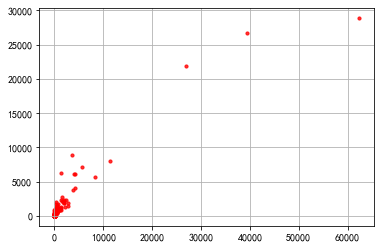

In [17]:
plt.scatter(resu_merge['投资企业对数'], resu_merge['融资企业对数'], color = 'red', marker = 'o',alpha = 0.8, s = 10)
plt.grid()
resu_merge['投资企业对数'] = (resu_merge['投资企业对数']-resu_merge['投资企业对数'].min())/(resu_merge['投资企业对数'].max()-resu_merge['投资企业对数'].min())
resu_merge['融资企业对数'] = (resu_merge['融资企业对数']-resu_merge['融资企业对数'].min())/(resu_merge['融资企业对数'].max()-resu_merge['融资企业对数'].min())


,投资企业对数,融资企业对数
城市,,
北京,1.000000,1.000000
上海,0.634288,0.925288
深圳,0.432744,0.757489
杭州,0.182455,0.277493
广州,0.132988,0.197545
...,...,...
大兴安岭地区,0.000000,0.000277
玉树藏族自治州,0.000000,0.000243
迪庆藏族自治州,0.000000,0.000173


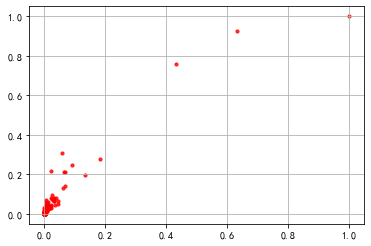

In [18]:
plt.scatter(resu_merge['投资企业对数'], resu_merge['融资企业对数'], color = 'red', marker = 'o',alpha = 0.8, s = 10)
plt.grid()
resu_merge.set_index('城市')

In [19]:
#k均值算法
k=3
kmeans = KMeans(n_clusters = k)
kmeans.fit(resu_merge[['投资企业对数','融资企业对数']])
y_kmeans = kmeans.predict(resu_merge[['投资企业对数','融资企业对数']])
r_count = pd.Series(kmeans.labels_).value_counts()
r_count

0    317
2      9
1      3
dtype: int64

In [76]:
#输出城市类别
r = pd.concat([resu_merge, pd.Series(kmeans.labels_, index = resu_merge.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(resu_merge.columns) + [u'聚类类别'] #重命名表头
for i in range(0,3):
    print('阵营为第%d类的城市为'%(i+1))
    print(resu_merge[r[u'聚类类别']==i])

阵营为第1类的城市为
           城市    投资企业对数    融资企业对数      城市实力
11         拉萨  0.044666  0.049854  0.047547
12         厦门  0.043831  0.064311  0.055426
13         郑州  0.036526  0.082305  0.062535
14         福州  0.033363  0.044481  0.039622
15         济南  0.032175  0.065421  0.051043
..        ...       ...       ...       ...
324    大兴安岭地区  0.000000  0.000277  0.000079
325   玉树藏族自治州  0.000000  0.000243  0.000059
326   迪庆藏族自治州  0.000000  0.000173  0.000020
327  怒江傈僳族自治州  0.000000  0.000139  0.000000
328      那曲地区  0.000000  0.000139  0.000000

[317 rows x 4 columns]
阵营为第2类的城市为
   城市    投资企业对数    融资企业对数      城市实力
0  北京  1.000000  1.000000  1.000000
1  上海  0.634288  0.925288  0.800076
2  深圳  0.432744  0.757489  0.617744
阵营为第3类的城市为
    城市    投资企业对数    融资企业对数      城市实力
3   杭州  0.182455  0.277493  0.236544
4   广州  0.132988  0.197545  0.169705
5   天津  0.089879  0.246533  0.179071
6   南京  0.069023  0.142075  0.110575
7   成都  0.068043  0.210373  0.149071
8   苏州  0.065041  0.210685  0.147957
9   武汉  0.06

In [77]:
tc_sum

,,投资企业对数
投资方所在城市,融资方所在城市,
深圳,深圳,92065
北京,北京,91391
上海,上海,84298
南京,南京,23873
杭州,杭州,23791
...,...,...
三沙,三沙,14
迪庆藏族自治州,迪庆藏族自治州,7
怒江傈僳族自治州,怒江傈僳族自治州,5


In [21]:
#使用PCA进行降维
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(resu_merge[['投资企业对数','融资企业对数']])
#降维后的数据
ans_pca = pca.transform(resu_merge[['投资企业对数','融资企业对数']])
ans_pca = (ans_pca-ans_pca.min())/(ans_pca.max() - ans_pca.min())
ans_pca
resu_merge['城市实力'] = ans_pca
resu_merge

,城市,投资企业对数,融资企业对数,城市实力
0,北京,1.000000,1.000000,1.000000
1,上海,0.634288,0.925288,0.800076
2,深圳,0.432744,0.757489,0.617744
3,杭州,0.182455,0.277493,0.236544
4,广州,0.132988,0.197545,0.169705
...,...,...,...,...
324,大兴安岭地区,0.000000,0.000277,0.000079
325,玉树藏族自治州,0.000000,0.000243,0.000059
326,迪庆藏族自治州,0.000000,0.000173,0.000020
327,怒江傈僳族自治州,0.000000,0.000139,0.000000


In [22]:
price = pd.read_excel(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\全国城市房价2020平均值.xlsx',index_col = '序号')
price = price [['城市名称','平均单价']]
#外连接
choice = pd.merge(resu_merge,price,left_on = '城市',right_on = '城市名称',how = 'outer')
#添加缺失值
choice['城市'][choice['城市'].isnull()] = choice['城市名称'][choice['城市'].isnull()]
choice.sort_values(by = '城市实力',ascending = False)
choice.to_excel(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\temp_data.xlsx')

In [38]:
choice.sort_values(by = '城市实力',inplace = True,ascending = False)
choice.head(20)

,城市,投资企业对数,融资企业对数,城市实力,城市名称,平均单价,选择优先级
index,,,,,,,
0,北京,1.000000,1.000000,1.000000,北京,63554.0,0.198181
1,上海,0.634288,0.925288,0.800076,上海,58831.0,0.259891
2,深圳,0.432744,0.757489,0.617744,深圳,78722.0,0.000000
3,杭州,0.182455,0.277493,0.236544,杭州,32181.0,0.608093
10,宁波,0.058041,0.308314,0.200576,宁波,24306.0,0.710986
5,天津,0.089879,0.246533,0.179071,天津,26397.0,0.683665
4,广州,0.132988,0.197545,0.169705,广州,38351.0,0.527477
7,成都,0.068043,0.210373,0.149071,成都,17443.0,0.800656
8,苏州,0.065041,0.210685,0.147957,苏州,22540.0,0.734060


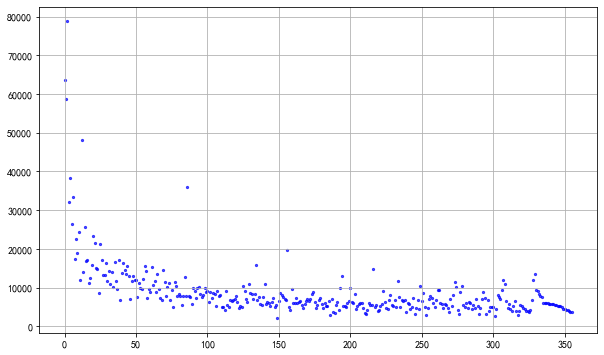

In [39]:
#观察点的趋势
plt.figure(figsize = (10,6))
plt.scatter(choice.index,choice['平均单价'], marker = '.', s = 20,color = 'blue',alpha = 0.7)
plt.grid()
# plt.plot(choice.index,choice['平均单价'],linestyle = '--',color = 'red',alpha = 0.7)
plt.savefig(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\图片\平均单价.png',bbox_inches='tight')

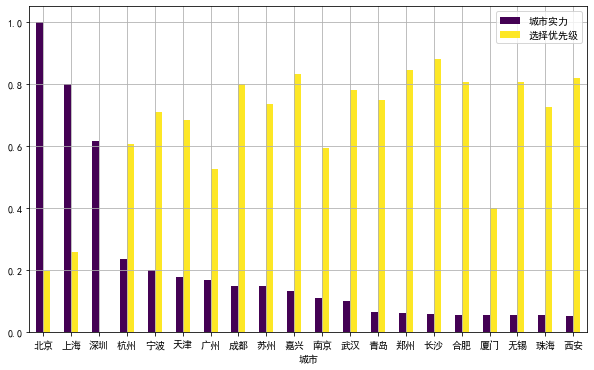

In [60]:

choice_20 = choice.reset_index().iloc[:20]
del choice_20['index']
choice_20.set_index('城市',inplace = True)
choice_20[['城市实力','选择优先级']].plot(kind = 'bar',stacked = False, figsize = (10,6),grid = True, rot = 0, colormap = 'viridis')
plt.savefig(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\图片\房价与实力top20.png',bbox_inches='tight')

In [65]:
choice_pg = choice[['城市','城市实力','选择优先级','平均单价']]
choice_pg.columns = ['city','power','priority','price']
choice_pg

,city,power,priority,price
index,,,,
0,北京,1.000000,0.198181,63554.0
1,上海,0.800076,0.259891,58831.0
2,深圳,0.617744,0.000000,78722.0
3,杭州,0.236544,0.608093,32181.0
10,宁波,0.200576,0.710986,24306.0
...,...,...,...,...
351,阿克苏,0.000000,0.973450,4218.0
352,黔西南,0.000000,0.973999,4176.0
353,哈密,0.000000,0.976691,3970.0


In [3]:
from bokeh.io import output_notebook
output_notebook()
#bokeh可交互方式图表
#工具栏
TOOLS = '''
        box_zoom,
        box_select, lasso_select,
        wheel_zoom,xwheel_zoom,ywheel_zoom,
        zoom_in,xzoom_in,yzoom_in,
        zoom_out,xzoom_out,yzoom_out,
        save,
        reset,pan,xpan,ypan,crosshair
    '''

#悬浮鼠标显示参数
source = ColumnDataSource(choice_pg)
hover = HoverTool(tooltips=[
                            ("index", "$index"),
                            ("(x,y)", "($x, $y)"),
                            ("city", "@city"),
                            ("power", "@power"),
                        ])
choice.index.name = 'index'

p = figure(plot_width =1200, plot_height = 600,
           toolbar_location = 'above',tools = [hover,TOOLS],
          )
p.circle(x = 'index', y = 'price',source = source,size = 5, color = 'navy',alpha = 0.5,
        legend_label = 'scatter-circle')
p.legend.location = 'top_right'
show(p)

Loading BokehJS ...

NameError: name 'choice_pg' is not defined

In [27]:
#拉格朗日插值
from scipy.interpolate import lagrange
#定义函数,s = 放入的数据, n = 缺失值的位置， k = 前后多少条数据拟合
def na_c(s,n,k=5):
#     y = s.reindex(list(range(n-k, n)) + list(range(n+1, n+1+k))) #取数不报错代码段
    y = s[list(range(n-k,n+1+k))] # 取数报错代码段
    y = y[y.notnull()]  # 剔除空值
    return(lagrange(y.index,list(y))(n))


In [82]:
data = choice['平均单价'].copy()
data

index
0      63554.0
1      58831.0
2      78722.0
3      32181.0
10     24306.0
        ...   
351     4218.0
352     4176.0
353     3970.0
354     3772.0
355     3747.0
Name: 平均单价, Length: 356, dtype: float64

In [83]:
data_na = data[data.isnull()]
print('缺失值数据量:%i' %len(data_na))
print('缺失数据占比:%.2f%%' %(len(data_na)/len(data)*100))

缺失值数据量:0
缺失数据占比:0.00%


In [84]:
#


for i in range(len(data)):
    if data.isnull()[i]:
        data[i] = na_c(data,i,3)
        print(data[i])
#前后k范围全是空值的地方删了


In [85]:
data.dropna(inplace = True)


In [86]:
choice['平均单价'] = data
choice.ffill(inplace = True)
#房价越高，优先级越低
choice['选择优先级'] = (choice['平均单价'].max() - choice['平均单价'])/( choice['平均单价'].max()- choice['平均单价'].min())
choice

,城市,投资企业对数,融资企业对数,城市实力,城市名称,平均单价,选择优先级
index,,,,,,,
0,北京,1.000000,1.000000,1.000000,北京,63554.0,0.198181
1,上海,0.634288,0.925288,0.800076,上海,58831.0,0.259891
2,深圳,0.432744,0.757489,0.617744,深圳,78722.0,0.000000
3,杭州,0.182455,0.277493,0.236544,杭州,32181.0,0.608093
10,宁波,0.058041,0.308314,0.200576,宁波,24306.0,0.710986
...,...,...,...,...,...,...,...
351,阿克苏,0.000000,0.000139,0.000000,阿克苏,4218.0,0.973450
352,黔西南,0.000000,0.000139,0.000000,黔西南,4176.0,0.973999
353,哈密,0.000000,0.000139,0.000000,哈密,3970.0,0.976691


,城市,城市实力,选择优先级,平均单价
index,,,,
0,北京,1.000000,0.198181,63554.0
1,上海,0.800076,0.259891,58831.0
2,深圳,0.617744,0.000000,78722.0
3,杭州,0.236544,0.608093,32181.0
10,宁波,0.200576,0.710986,24306.0
...,...,...,...,...
351,阿克苏,0.000000,0.973450,4218.0
352,黔西南,0.000000,0.973999,4176.0
353,哈密,0.000000,0.976691,3970.0


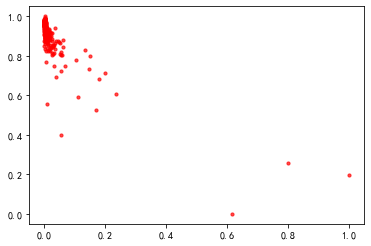

In [87]:
choice = choice[['城市','城市实力','选择优先级','平均单价']]

plt.scatter(choice['城市实力'],choice['选择优先级'], s = 10, color = 'red',marker = 'o', alpha = 0.7)
choice

In [88]:
#再用K均值
k=3
kmeans2 = KMeans(n_clusters = k)
kmeans2.fit(choice[['城市实力','选择优先级']])
y_kmeans2 = kmeans2.predict(choice[['城市实力','选择优先级']])
r_count2 = pd.Series(kmeans2.labels_).value_counts()
r_count2

0    329
2     24
1      3
dtype: int64

In [89]:
r = pd.concat([choice, pd.Series(kmeans2.labels_, index = choice.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(choice.columns) + [u'聚类类别']
 #重命名表头
for i in range(0,3):
    print('阵营为第%d类的城市为'%(i+1))
    print(choice[r[u'聚类类别']==i])


阵营为第1类的城市为
        城市      城市实力     选择优先级     平均单价
index                                  
13      郑州  0.062535  0.844727  14070.0
17      长沙  0.059427  0.880657  11320.0
18      重庆  0.049824  0.865919  12448.0
11      拉萨  0.047547  0.870884  12068.0
49      湖州  0.044203  0.872779  11923.0
...    ...       ...       ...      ...
351    阿克苏  0.000000  0.973450   4218.0
352    黔西南  0.000000  0.973999   4176.0
353     哈密  0.000000  0.976691   3970.0
354     博州  0.000000  0.979278   3772.0
355     海西  0.000000  0.979604   3747.0

[329 rows x 4 columns]
阵营为第2类的城市为
       城市      城市实力     选择优先级     平均单价
index                                 
0      北京  1.000000  0.198181  63554.0
1      上海  0.800076  0.259891  58831.0
2      深圳  0.617744  0.000000  78722.0
阵营为第3类的城市为
       城市      城市实力     选择优先级     平均单价
index                                 
3      杭州  0.236544  0.608093  32181.0
10     宁波  0.200576  0.710986  24306.0
5      天津  0.179071  0.683665  26397.0
4      广州  0.169705  0.527477  38

In [90]:
#房价中等，城市实力中等
r_2 = pd.DataFrame(r['城市'][r['聚类类别']==2])
r_2 = pd.merge(r,r_2,on = '城市', how = 'inner')
r_2.sort_values(by = '平均单价', ascending = True)
r_2.reindex
del r_2['聚类类别']
r_2

,城市,城市实力,选择优先级,平均单价
0,杭州,0.236544,0.608093,32181.0
1,宁波,0.200576,0.710986,24306.0
2,天津,0.179071,0.683665,26397.0
3,广州,0.169705,0.527477,38351.0
4,成都,0.149071,0.800656,17443.0
5,苏州,0.147957,0.734060,22540.0
6,嘉兴,0.132333,0.830433,15164.0
7,南京,0.110575,0.593459,33301.0
8,武汉,0.102450,0.780038,19021.0
9,青岛,0.066232,0.747779,21490.0


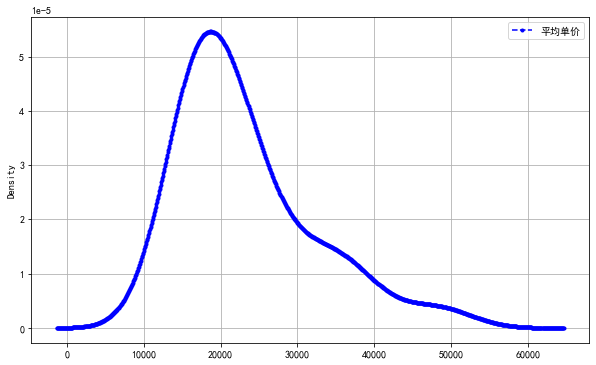

In [113]:
r_2 = r_2.sort_values(by = '平均单价',ascending = True)
r_2[['平均单价']].plot(kind = 'kde', style = '--.b',grid = True, figsize = (10,6))
plt.savefig(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\图片\中中城市房价密度曲线.png',bbox_inches='tight')

In [115]:
r_2['选择优先级'] = (r_2['选择优先级'] - r_2['选择优先级'].min())/(r_2['选择优先级'].max()-r_2['选择优先级'].min())
r_2['城市实力'] = (r_2['城市实力'] - r_2['城市实力'].min())/(r_2['城市实力'].max()-r_2['城市实力'].min())
r_2['综合优先级'] = (r_2['选择优先级']+r_2['城市实力'])/2
r_2 = r_2.sort_values(by = '综合优先级',ascending = False)


r_2

,城市实力,选择优先级,平均单价,综合优先级
城市,,,,
宁波,0.845539,0.723012,24306.0,0.784275
成都,0.624359,0.930950,17443.0,0.777655
嘉兴,0.552480,1.000000,15164.0,0.776240
杭州,1.000000,0.484411,32181.0,0.742206
天津,0.753189,0.659658,26397.0,0.706423
苏州,0.619575,0.776519,22540.0,0.698047
武汉,0.424149,0.883139,19021.0,0.653644
西安,0.214354,0.975458,15974.0,0.594906
合肥,0.227379,0.941494,17095.0,0.584437


In [116]:
r_2['综合优先级'] = (1.5*r_2['选择优先级']+0.5*r_2['城市实力'])/2
r_2 = r_2.sort_values(by = '综合优先级',ascending = False)


r_2

,城市实力,选择优先级,平均单价,综合优先级
城市,,,,
嘉兴,0.552480,1.000000,15164.0,0.888120
成都,0.624359,0.930950,17443.0,0.854302
西安,0.214354,0.975458,15974.0,0.785182
武汉,0.424149,0.883139,19021.0,0.768391
合肥,0.227379,0.941494,17095.0,0.762965
无锡,0.222150,0.940403,17131.0,0.760840
济南,0.203387,0.946069,16944.0,0.760398
宁波,0.845539,0.723012,24306.0,0.753643
南通,0.119393,0.960006,16484.0,0.749853


In [93]:
r_2 = r_2.set_index('城市')


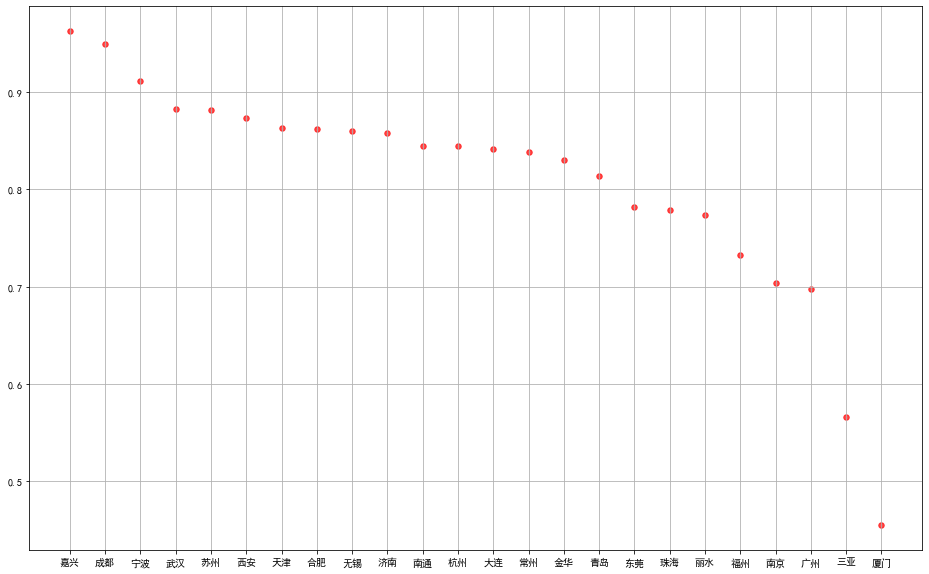

In [94]:

plt.figure(figsize = (16,10))
plt.scatter(r_2.index, r_2['综合优先级'],s = 30, marker = 'o', color = 'r', alpha = 0.7)
plt.grid()
plt.savefig(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\图片\二线城市优先级.png',bbox_inches='tight')

In [95]:
# 2013-2016 资本流动两大阵营
# 北上深阵营
# 本地阵营

def f2(year):
    #融资城市得到投资最大的，投资方城市
    kc_datai = data_kc[data_kc['年份']==year]
    x = kc_datai[['融资方所在城市','投资企业对数']].groupby('融资方所在城市').max().reset_index()
    #print(x)
    city_tz_max = pd.merge(kc_datai, x, on = ['融资方所在城市','投资企业对数'],how = 'right')
    #print(city_tz_max)
    #划分两大阵营
    city_tz_max['阵营'] = 0

    city_tz_max['阵营'][(city_tz_max['投资方所在城市'] == '北京')|
                      (city_tz_max['投资方所在城市'] == '深圳')|
                      (city_tz_max['投资方所在城市'] == '上海')] = 1

    #匹配经纬度
    city_tz_max = pd.merge(city_tz_max, city[['城市名称','经度','纬度']],left_on = '融资方所在城市',right_on = '城市名称' )

    city_tz_max = city_tz_max[['投资方所在城市','融资方所在城市','阵营','投资企业对数','经度','纬度']]

    dici = {}
    dici['北上深阵营城市数量'] = city_tz_max['阵营'].value_counts().iloc[1]
    dici['本地化阵营城市数量'] = city_tz_max['阵营'].value_counts().iloc[0]

    return(city_tz_max,dici)
#f2(2013)

In [96]:
zy_year = pd.DataFrame([f2(2013)[1],f2(2014)[1],f2(2015)[1],f2(2016)[1]],
                                                  index = ['2013年','2014年','2015年','2016年'])

zy_year['北上深阵营占比'] = zy_year['北上深阵营城市数量']/(zy_year['北上深阵营城市数量']+zy_year['本地化阵营城市数量'])

zy_year


,北上深阵营城市数量,本地化阵营城市数量,北上深阵营占比
2013年,78,146,0.348214
2014年,101,187,0.350694
2015年,117,180,0.393939
2016年,135,159,0.459184


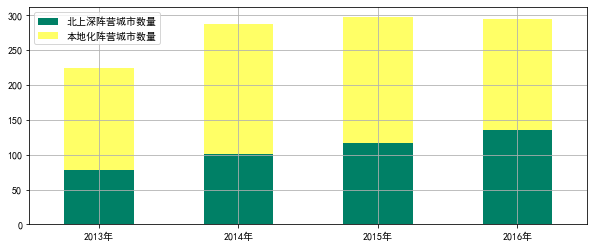

In [97]:
zy_year[['北上深阵营城市数量','本地化阵营城市数量']].plot(kind = 'bar', stacked = True, figsize = (10,4),grid = True, rot = 0, colormap = 'summer')
plt.savefig(r'C:\Users\89344\Desktop\数据挖掘大作业\中国城市资本流动问题探索\图片\北上深阵营城市数量占比.png',bbox_inches='tight')

In [98]:
for i in range(2013,2017):
    f2(i)[0].to_csv(r'C:\Users\89344\Desktop\Qgis图表\城市年份综合分布\year%s.csv'%str(i) , index = False,encoding='utf_8_sig')

